# Optimization Solver: A Qiskit Function by Q-CTRL Fire Opal

<Admonition type="note">
Qiskit Functions are an experimental feature available only to IBM Quantum&reg; Premium Plan, Flex Plan, and On-Prem (via IBM Quantum Platform API) Plan users. They are in preview release status and subject to change.
</Admonition>

## Overview

With the Fire Opal Optimization Solver, you can solve utility-scale optimization problems on quantum hardware without requiring quantum expertise. Simply input the high-level problem definition, and the Solver takes care of the rest. The entire workflow is noise-aware and leverages [Fire Opal's Performance Management](/docs/guides/q-ctrl-performance-management) under the hood. The Solver consistently delivers accurate solutions to classically challenging problems, even at full-device scale on the largest IBM&reg; QPUs.

The Solver is flexible and can be used to solve combinatorial optimization problems defined as objective functions or arbitrary graphs. Problems do not have to be mapped to device topology. Both unconstrained and constrained problems are solvable, given that constraints can be formulated as penalty terms. The examples included in this guide demonstrate how to solve an unconstrained and a constrained utility-scale optimization problem using different Solver input types. The first example involves a Max-Cut problem defined on a 156-node, 3-Regular graph, while the second example tackles a 50-node Minimum Vertex Cover problem defined by a cost function.

To get access to the Optimization Solver, [contact Q-CTRL](https://form.typeform.com/to/uOAVDnGg?typeform-source=q-ctrl.com).

## Function description

The Solver fully optimizes and automates the entire algorithm, from error suppression at the hardware level to efficient problem mapping and closed-loop classical optimization. Behind the scenes, the Solver's pipeline reduces errors at every stage, enabling the enhanced performance required to meaningfully scale. The underlying workflow is inspired by the Quantum Approximate Optimization Algorithm (QAOA), which is a hybrid quantum-classical algorithm. For a detailed summary of the full Optimization Solver workflow, refer to [the published manuscript](https://arxiv.org/abs/2406.01743).


![Visualization of the Optimization Solver workflow](/docs/images/guides/qctrl-optimization/solver_workflow.svg)

To solve a generic problem with the Optimization Solver:
1. Define your problem as an objective function, a graph, or `SparsePauliOp` spin chain.
2. Connect to the function through the Qiskit Functions Catalog.
3. Run the problem with the Solver and retrieve results.

## Inputs and outputs
### Inputs

| Name    | Type                    | Description                                                                                                                                                                                         | Required | Default | Example |
| ---------  |-------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| -------- | ---------- | ---------- |
| problem  | `str` or `SparsePauliOp` | One of the representations listed under "Accepted problem formats"                                                                                                                                  | Yes | N/A   |`Poly(2.0*n[0]*n[1] + 2.0*n[0]*n[2] - 3.13520241298341*n[0] + 2.0*n[1]*n[2] - 3.14469748506794*n[1] - 3.18897660121566*n[2] + 6.0, n[0], n[1], n[2], domain='RR')` |
| problem_type  | `str`                   | Name of the problem class; only used for graph  and spin chain problem definitions, which are limited to "maxcut" or "spin_chain"; not required for arbitrary objective function problem definitions | No      | `None`| `"maxcut"`      |
| backend_name  | `str`                   | Name of the backend to use                                                                                                                                                                          | No  | Least busy backend that your instance has access to    | `"ibm_fez"`      |
| options  | `dict`                  | Input options, including the following: (Optional) `session_id`: `str`; default behavior creates a new Session                                                                                      | No | `None`    | `{"session_id": "cw2q70c79ws0008z6g4g"}`     |

**Accepted problem formats:**
- Polynomial expression representation of an objective function. Ideally created in Python with an existing SymPy Poly object and formatted into a string using [sympy.srepr](https://docs.sympy.org/latest/tutorials/intro-tutorial/printing.html#srepr).
- Graph representation of a specific problem type. The graph should be created using the networkx library in Python. It should then converted to a string by using the networkx function `[nx.readwrite.json_graph.adjacency_data](http://nx.readwrite.json_graph.adjacency_data.)`.
- Spin chain representation of a specific problem. The spin chain should be represented as a `SparsePauliOp` object; see the [documentation](/docs/api/qiskit/qiskit.quantum_info.SparsePauliOp) for more details.

**Supported backends:**
The following list of backends are currently supported. If your device is not listed, [reach out to Q-CTRL](https://form.typeform.com/to/iuujEAEI?typeform-source=q-ctrl.com) to add support.
- ibm_brisbane
- ibm_brussels
- ibm_cleveland
- ibm_fez
- ibm_kawasaki
- ibm_nazca
- ibm_quebec
- ibm_rensselaer
- ibm_strasbourg
- ibm_torino

**Options:**
| Name   | Type   | Description  | Default |
|--------|----------|-----------------------|---------------------|
| session_id | `str`  | An existing Qiskit Runtime session ID  | `"cw4r3je6f0t010870y3g"` |
| job_tags | `list[str]` | A list of job tags | `[]`|

### Outputs
| Name    | Type | Description | Example |
| ---------  | ---------------- | -------------------------- | -------- |
| result  | `dict[str, Any]`              | Solution and metadata listed under "Result dictionary contents"         | `{'solution_bitstring_cost': 3.0, ‘final_bitstring_distribution’: {‘000001’: 100, ‘000011’: 2}, ‘iteration_count’: 3, 'solution_bitstring': ‘000001’,  'variables_to_bitstring_index_map': {n[1]': 5, 'n[2]': 4, 'n[3]': 3, 'n[4]': 2, 'n[5]': 1}, 'best_parameters': [0.19628831763697097, -1.047052334523102], 'warnings': []}`     |


**Result dictionary contents:**
| Name    | Type | Description |
| ---------  | ---------------- | -------------------------- |
| solution_bitstring_cost  | `float`              | The best minimum cost across all iterations        |
| final_bitstring_distribution  | `CountsDict`              | The bitstring counts dictionary associated with the minimum cost        |
| solution_bitstring | `str`              | Bitstring with the best cost in the final distribution         |
| iteration_count  | `int`              | The total number of QAOA iterations performed by the Solver        |
| variables_to_bitstring_index_map  | `float`              | The mapping from the variables to the equivalent bit in the bitstring       |
| best_parameters  | `list[float]`            | The optimized beta and gamma parameters across all iterations  |
| warnings  |`list[str]`              | The warnings produced while compiling or running QAOA (defaults to None)   |

## Benchmarks

[Published benchmarking results](https://arxiv.org/abs/2406.01743) show that the Solver successfully solves problems with over 120 qubits, even outperforming previously published results on quantum annealing and trapped-ion devices. The following benchmark metrics provide a rough indication of the accuracy and scaling of problem types based on a few examples. Actual metrics may differ based on various problem features, such as the number of terms in the objective function (density) and their locality, number of variables, and polynomial order.

The "Number of qubits" indicated is not a hard limitation but represents rough thresholds where you can expect extremely consistent solution accuracy. Larger problem sizes have been successfully solved, and testing beyond these limits is encouraged.

Arbitrary qubit connectivity is supported across all problem types.

| Problem type    | Number of qubits | Example | Accuracy | Total time (s) | Runtime usage (s) | Number of iterations
| ---------  | ---------------- | -------------------------- | -------- | ---------- | ------------- |---- |
| Sparsely-connected quadratic problems  | 156 | 3-regular Max-Cut| 100%     | 1764     | 293          | 16 |
| Higher-order binary optimization | 156 | Ising spin-glass model | 100%      | 1461     | 272          | 16 |
| Densely-connected quadratic problems | 50 | Fully-connected Max-Cut| 100%      |  1758    | 268  | 12 |
| Constrained problem with penalty terms | 50 | Weighted Minimum Vertex Cover with 8% edge density | 100%      | 1074     | 215 | 10 |

## Get started

First, authenticate using your [IBM Quantum API key](http://quantum.cloud.ibm.com/). Then, select the Qiskit Function as follows. (This snippet assumes you've already [saved your account](/docs/guides/functions#install-qiskit-functions-catalog-client) to your local environment.)

In [1]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

catalog = QiskitFunctionsCatalog(channel="ibm_quantum_platform")

# Access Function
solver = catalog.load("q-ctrl/optimization-solver")

## Example: Unconstrained optimization
Run the [maximum cut](https://en.wikipedia.org/wiki/Maximum_cut) (Max-Cut) problem. The following example demonstrates the Solver's capabilities on a 156-node, 3-regular unweighted graph Max-Cut problem, but you can also solve weighted graph problems.

In addition to `qiskit-ibm-catalog`, you will also use the following packages to run this example: `networkx` and `numpy`. You can install these packages by uncommenting the following cell if you are running this example in a notebook using the IPython kernel.

In [2]:
# %pip install networkx numpy

### 1. Define the problem
You can run a Max-Cut problem by defining a graph problem and specifying `problem_type='maxcut'`.

In [3]:
import networkx as nx
import numpy as np

# Generate a random graph with 156 nodes
maxcut_graph = nx.random_regular_graph(d=3, n=116, seed=8)

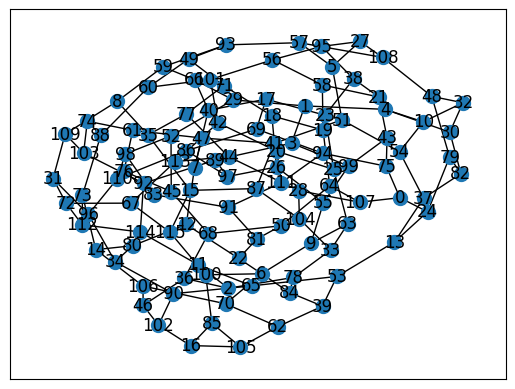

In [4]:
# Optionally, visualize the graph
nx.draw_networkx(maxcut_graph, nx.kamada_kawai_layout(maxcut_graph), node_size=100)

The Solver accepts a string as the problem definition input.

In [5]:
# Convert graph to string
problem_as_str = nx.readwrite.json_graph.adjacency_data(maxcut_graph)

### 2. Run the problem
When using the graph-based input method, specify the problem type.

In [6]:
# This cell is hidden from users
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend_name = service.least_busy().name

In [7]:
# Solve the problem
maxcut_job = solver.run(
    problem=problem_as_str,
    problem_type="maxcut",
    backend_name=backend_name,  # E.g. "ibm_fez"
)

Check your Qiskit Function workload's [status](/docs/guides/functions#check-job-status) or return [results](/docs/guides/functions#retrieve-results) as follows:

In [8]:
# Get job status
print(maxcut_job.status())

QUEUED


### 3. Retrieve the result
Retrieve the optimal cut value from the results dictionary.

<Admonition type="note">The mapping of the variables to the bitstring may have changed. The output dictionary contains a `variables_to_bitstring_index_map` sub-dictionary, which helps to verify the ordering.</Admonition>

In [ ]:
# Poll for results
maxcut_result = maxcut_job.result()

# Take the absolute value of the solution since the cost function is minimized
qctrl_maxcut = abs(maxcut_result["solution_bitstring_cost"])

# Print the optimal cut value found by the Optimization Solver
print(f"Optimal cut value: {qctrl_maxcut}")

You can verify the accuracy of the result by solving the problem classically with open-source solvers like [PuLP](https://coin-or.github.io/pulp/) if the graph is not densely connected. High density problems may require advanced classical solvers to validate the solution.

## Example: Constrained optimization
The prior Max-Cut example is a common quadratic unconstrained binary optimization problem. Q-CTRL's Optimization Solver can be used for various problem types, including constrained optimization. You can solve arbitrary problem types by inputting the problem definition represented as a polynomial where constraints are modeled as penalty terms.

The following example demonstrates how to construct a cost function for a constrained optimization problem, [minimum vertex cover](https://en.wikipedia.org/wiki/Vertex_cover) (MVC).

In addition to the `qiskit-ibm-catalog` and `qiskit` packages, you will also use the following packages to run this example: `numpy`, `networkx`, and `sympy`. You can install these packages by uncommenting the following cell if you are running this example in a notebook using the IPython kernel.

In [ ]:
# %pip install numpy networkx sympy

### 1. Define the problem
Define a random MVC problem by generating a graph with randomly weighted nodes.

In [ ]:
import networkx as nx
from sympy import symbols, Poly, srepr

# To change the weights, change the seed to any integer.
rng_seed = 18
_rng = np.random.default_rng(rng_seed)
node_count = 50
edge_probability = 0.08
mvc_graph = nx.erdos_renyi_graph(
    node_count, edge_probability, seed=rng_seed, directed=False
)

# add node weights
for i in mvc_graph.nodes:
    mvc_graph.add_node(i, weight=_rng.random())

# Optionally, visualize the graph
nx.draw_networkx(mvc_graph, nx.kamada_kawai_layout(mvc_graph), node_size=200)

<Image src="/docs/images/guides/q-ctrl-optimization-solver/extracted-outputs/c2ce65e3-0.avif" alt="Output of the previous code cell" />

A standard optimization model for weighted MVC can be formulated as follows. First, a penalty must be added for any case where an edge is not connected to a vertex in the subset. Therefore, let $n_i = 1$ if vertex $i$ is in the cover (i.e., in the subset) and $n_i = 0$ otherwise. Second, the goal is to minimize the total number of vertices in the subset, which can be represented by the following function:

$$\textbf{Minimize}\qquad y = \sum_{i\in V} \omega_i n_i$$

In [ ]:
# Construct the cost function.
variables = symbols([f"n[{i}]" for i in range(node_count)])
cost_function = Poly(0, variables)

for i in mvc_graph.nodes():
    weight = mvc_graph.nodes[i].get("weight", 0)
    cost_function += variables[i] * weight

Now every edge in the graph should include at least one end point from the cover, which can be expressed as the inequality:

$$n_i + n_j \ge 1 \texttt{ for all } (i,j)\in E$$

Any case where an edge is not connected to the vertex of cover must be penalized. This can be represented in the cost function by adding a penalty of the form $P(1-n_i-n_j+n_i n_j)$ where $P$ is a positive penalty constant. Thus, an unconstrained alternative to the constrained inequality for weighted MVC is:

$$\textbf{Minimize}\qquad y = \sum_{i\in V}\omega_i n_i + P(\sum_{(i,j)\in E}(1 - n_i - n_j + n_i n_j))$$

In [ ]:
# Add penalty term.
penalty_constant = 2
for i, j in mvc_graph.edges():
    cost_function += penalty_constant * (
        1 - variables[i] - variables[j] + variables[i] * variables[j]
    )

### 2. Run the problem

In [ ]:
# Solve the problem
mvc_job = solver.run(
    problem=srepr(cost_function),
    backend_name=backend_name,  # E.g. "ibm_fez"
)

Check your Qiskit Function workload's [status](/docs/guides/functions#check-job-status) or return [results](/docs/guides/functions#retrieve-results) as follows:

In [ ]:
print(mvc_job.status())

### 3. Get the result
Retrieve the solution and analyze the results. Because this problem has weighted nodes, the solution is not simply the minimum number of nodes covered. Instead, the solution cost represents the sum of the weights of the vertices that are included in the vertex cover. It represents the total "cost" or "weight" of covering all the edges in the graph using the selected vertices.

In [ ]:
mvc_result = mvc_job.result()
qctrl_cost = mvc_result["solution_bitstring_cost"]

# Print results
print(f"Solution cost: {qctrl_cost}")

Solution cost: 10.248198273708624


## Get support

For any questions or issues, [reach out to Q-CTRL](https://form.typeform.com/to/iuujEAEI?typeform-source=q-ctrl.com).

## Next steps

<Admonition type="tip" title="Recommendations">

- Request access to [Q-CTRL Optimization Solver.](https://quantum.cloud.ibm.com/functions?id=q-ctrl-optimization-solver)
- Try the [Solve higher-order binary optimization problems with Q-CTRL's Optimization Solver](/docs/tutorials/solve-higher-order-binary-optimization-problems-with-q-ctrls-optimization-solver) tutorial.

</Admonition>